In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import json
from collections import Counter


data_dir = "/content/gdrive/MyDrive/YoloVQA/data/test"
images_dir = os.path.join(data_dir, "images")
labels_dir = os.path.join(data_dir, "labels")
output_json = os.path.join(data_dir, "vqa_dataset.json")

class_names = ['circle', 'ellipse', 'hexagon', 'pentagon', 'quatrefoil',
               'rectangle', 'rhombus', 'square', 'star', 'triangle']


image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
label_files = [f for f in os.listdir(labels_dir) if f.lower().endswith('.txt')]

if not image_files or not label_files:
    raise FileNotFoundError("No images or labels found in the specified directories.")

vqa_data = []
for image_file in image_files:
    label_file = os.path.join(labels_dir, image_file.replace(".png", ".txt").replace(".jpg", ".txt").replace(".jpeg", ".txt"))
    if not os.path.exists(label_file) or os.path.getsize(label_file) == 0:
        continue

    with open(label_file, "r") as f:
        labels = [line.strip().split()[0] for line in f]
        class_counts = Counter([class_names[int(cls)] for cls in labels])

    shapes_in_image = ", ".join(sorted(class_counts.keys()))
    vqa_data.append({
        "image": os.path.join(images_dir, image_file),
        "question": "What shapes are in the image?",
        "answer": shapes_in_image
    })

    for cls, count in class_counts.items():
        answer_text = f"{count} {cls}{'s' if count > 1 else ''}"
        vqa_data.append({
            "image": os.path.join(images_dir, image_file),
            "question": f"How many {cls}s are there in this image?",
            "answer": answer_text
        })


with open(output_json, "w", encoding="utf-8") as f:
    json.dump(vqa_data, f, indent=4)

print(f"VQA 数据集已生成，包含 {len(vqa_data)} 个问答对，保存为: {output_json}")



VQA 数据集已生成，包含 140 个问答对，保存为: /content/gdrive/MyDrive/YoloVQA/data/test/vqa_dataset.json


In [ ]:
import yaml

def load_class_names(yaml_path):
    with open(yaml_path, 'r') as f:
        data_yaml = yaml.safe_load(f)
    return data_yaml.get('names', [])

yaml_path = "/content/gdrive/MyDrive/YoloVQA/yolov7/data_yaml"
class_names = load_class_names(yaml_path)

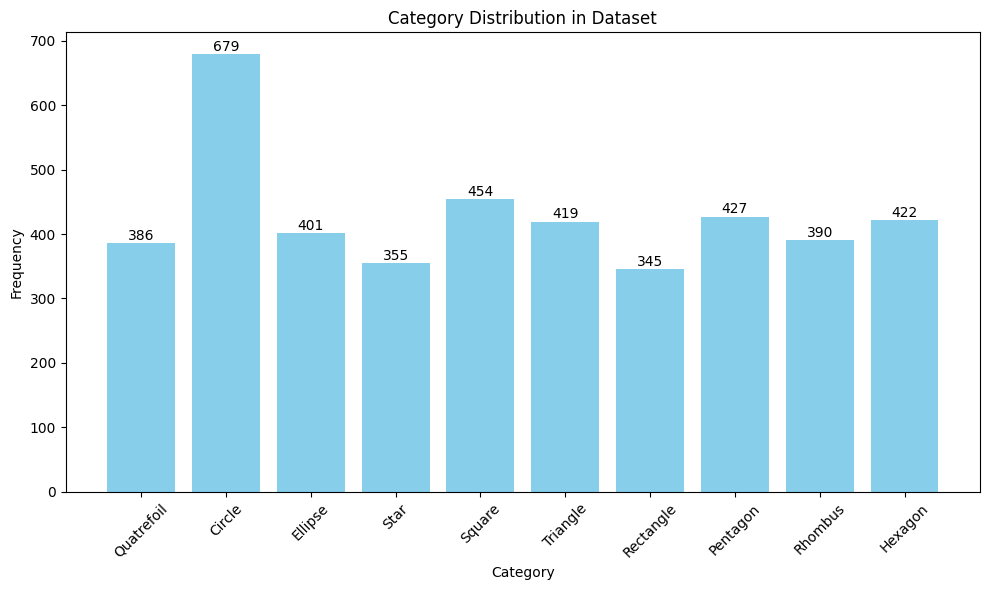

In [ ]:
import os
from collections import Counter
import matplotlib.pyplot as plt

def visualize_label_distribution(dataset_path):
    label_counter = Counter()
    for split in ['train', 'test', 'valid']:
        labels_path = os.path.join(dataset_path, split, 'labels')
        for file_name in os.listdir(labels_path):
            if file_name.endswith(".txt"):
                with open(os.path.join(labels_path, file_name), "r") as f:
                    for line in f:
                        label = int(line.split()[0])
                        label_counter[class_names[label]] += 1

    labels, counts = zip(*label_counter.items())
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color='skyblue')
    plt.xlabel("Category")
    plt.ylabel("Frequency")
    plt.title("Category Distribution in Dataset")
    plt.xticks(rotation=45)

        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()


dataset_path = "/content/gdrive/MyDrive/YoloVQA/data"
visualize_label_distribution(dataset_path)

In [ ]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from graphviz import Digraph

def create_yolov7_backbone_flowchart():
    dot = Digraph(comment='YOLOv7 Backbone Flowchart')
    dot.node('L0', 'Layer 0: Conv(40, 3, 1)')
    dot.node('L1-2', 'Layers 1-2: Conv(80, 3, 2) -> Conv(80, 3, 1)')
    dot.node('L3', 'Layer 3: Conv(160, 3, 2) (P2/4)')
    dot.node('L4-5', 'Layers 4-5: Conv(64, 1, 1)')
    dot.node('L6-12', 'Layers 6-12: Conv(64, 3, 1)')
    dot.node('L13', 'Layer 13: Concat + Conv(320, 1, 1)')
    dot.node('L14', 'Layer 14: Max Pooling (MP)')
    dot.node('L15-17', 'Layers 15-17: Conv(160, 1, 1) -> Conv(160, 1, 1) -> Conv(160, 3, 2) (P3/8)')
    dot.node('L18', 'Layer 18: Concat + Conv')
    dot.node('L19-27', 'Layers 19-27: Conv(128, 3, 1)')
    dot.node('L28', 'Layer 28: Concat + Conv(640, 1, 1)')
    dot.node('L29', 'Layer 29: Max Pooling (MP)')
    dot.node('L30-32', 'Layers 30-32: Conv (Increasing channels)')
    dot.node('L33', 'Layer 33: Concat (P4/16) + Conv')
    dot.node('L34-42', 'Layers 34-42: Conv(256, 3, 1)')
    dot.node('L43', 'Layer 43: Conv(1280, 1, 1)')
    dot.node('L44', 'Layer 44: Max Pooling (MP)')
    dot.node('L45-57', 'Layers 45-57: Conv + Concat')
    dot.node('L58', 'Layer 58: Conv(1280, 1, 1)')

    dot.edge('L0', 'L1-2')
    dot.edge('L1-2', 'L3')
    dot.edge('L3', 'L4-5')
    dot.edge('L4-5', 'L6-12')
    dot.edge('L6-12', 'L13')
    dot.edge('L13', 'L14')
    dot.edge('L14', 'L15-17')
    dot.edge('L15-17', 'L18')
    dot.edge('L18', 'L19-27')
    dot.edge('L19-27', 'L28')
    dot.edge('L28', 'L29')
    dot.edge('L29', 'L30-32')
    dot.edge('L30-32', 'L33')
    dot.edge('L33', 'L34-42')
    dot.edge('L34-42', 'L43')
    dot.edge('L43', 'L44')
    dot.edge('L44', 'L45-57')
    dot.edge('L45-57', 'L58')
    dot.render('yolov7_backbone_flowchart_v3', view=True, format='png')

create_yolov7_backbone_flowchart()



In [ ]:
from graphviz import Digraph

def create_yolov7_head_flowchart():
    dot = Digraph(comment='YOLOv7 Head Flowchart', format='png')
    dot.node('59', 'SPPCSPC Layer (Layer 59)')
    dot.node('60', 'Conv Layer (Layer 60)')
    dot.node('61', 'Upsample Layer (Layer 61)')
    dot.node('62', 'Route Backbone P4 (Layer 62)')
    dot.node('63', 'Concat Layer (Layer 63)')
    dot.node('64-69', 'Conv Layers (Layer 64 to 69)')
    dot.node('70', 'Concat Layer (Layer 70)')
    dot.node('71', 'Conv Layer (Layer 71)')
    dot.node('72', 'Upsample Layer (Layer 72)')
    dot.node('73', 'Route Backbone P3 (Layer 73)')
    dot.node('74', 'Concat Layer (Layer 74)')
    dot.node('75-80', 'Conv Layers (Layer 75 to 80)')
    dot.node('81', 'Concat Layer (Layer 81)')
    dot.node('82', 'Conv Layer (Layer 82)')
    dot.node('83', 'MP Layer (Layer 83)')
    dot.node('84', 'Conv Layer (Layer 84)')
    dot.node('85', 'Conv Layer (Layer 85)')
    dot.node('86', 'Conv Layer (Layer 86)')
    dot.node('87', 'Concat Layer (Layer 87)')
    dot.node('88-93', 'Conv Layers (Layer 88 to 93)')
    dot.node('94', 'Concat Layer (Layer 94)')
    dot.node('95', 'Conv Layer (Layer 95)')
    dot.node('96', 'MP Layer (Layer 96)')
    dot.node('97', 'Conv Layer (Layer 97)')
    dot.node('98', 'Conv Layer (Layer 98)')
    dot.node('99', 'Conv Layer (Layer 99)')
    dot.node('100', 'Concat Layer (Layer 100)')
    dot.node('101-106', 'Conv Layers (Layer 101 to 106)')
    dot.node('107', 'Concat Layer (Layer 107)')
    dot.node('108', 'Conv Layer (Layer 108)')
    dot.node('109', 'IDetect Layer (Layer 109)')
    dot.edge('59', '60')
    dot.edge('60', '61')
    dot.edge('61', '63')
    dot.edge('62', '63')
    dot.edge('63', '64-69')
    dot.edge('64-69', '70')
    dot.edge('70', '71')
    dot.edge('71', '72')
    dot.edge('72', '74')
    dot.edge('73', '74')
    dot.edge('74', '75-80')
    dot.edge('75-80', '81')
    dot.edge('81', '82')
    dot.edge('82', '83')
    dot.edge('83', '84')
    dot.edge('84', '86')
    dot.edge('85', '86')
    dot.edge('86', '87')
    dot.edge('87', '88-93')
    dot.edge('88-93', '94')
    dot.edge('94', '95')
    dot.edge('95', '96')
    dot.edge('96', '97')
    dot.edge('97', '99')
    dot.edge('98', '99')
    dot.edge('99', '100')
    dot.edge('100', '101-106')
    dot.edge('101-106', '107')
    dot.edge('107', '108')
    dot.edge('108', '109')
    dot.render('yolov7_head_flowchart_v4', view=True)


create_yolov7_head_flowchart()

